In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [5]:
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit_programmieren/2.Versuch/Data/RNAz_Excel/alifoldz.xlsx"))

In [6]:
# df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/alifoldz.xlsx"))

In [7]:
new_df_sissi = df_sissi.drop(['Sequences', 'Columns'], axis=1)
new_df_sissi.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,87.86,0.34926,0.51372,-157.92,-93.58,-87.84,-5.73,2.45,-40.31,0.59,3.32,0.998330,pos_sample_output_1.txt
1,87.91,0.35306,0.45844,-153.97,-75.05,-70.72,-4.33,2.37,-63.96,0.49,3.63,0.999073,pos_sample_output_10.txt
2,87.23,0.36691,0.51528,-167.49,-92.90,-88.38,-4.52,2.51,-45.40,0.55,3.47,0.998749,pos_sample_output_100.txt
3,87.56,0.35636,0.51886,-169.74,-91.02,-86.58,-4.43,2.38,-45.34,0.54,3.50,0.998818,pos_sample_output_101.txt
4,88.11,0.34293,0.46515,-157.58,-90.86,-87.00,-3.86,2.36,-57.73,0.58,3.36,0.998450,pos_sample_output_102.txt
5,86.76,0.37858,0.46912,-153.34,-94.53,-88.86,-5.67,2.60,-54.35,0.62,3.19,0.997832,pos_sample_output_103.txt
6,88.21,0.33956,0.51061,-160.53,-83.02,-76.85,-6.17,2.41,-42.64,0.52,3.55,0.998925,pos_sample_output_104.txt
7,88.10,0.34624,0.44542,-145.68,-86.12,-83.59,-2.53,2.43,-66.12,0.59,3.32,0.998330,pos_sample_output_105.txt
8,87.51,0.35659,0.47797,-146.18,-89.53,-84.82,-4.70,2.30,-44.88,0.61,3.24,0.998034,pos_sample_output_106.txt
9,87.72,0.35496,0.51976,-164.70,-106.71,-101.14,-5.57,2.45,-43.06,0.65,3.05,0.997166,pos_sample_output_107.txt


In [8]:
new_df_sissi[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,87.296940,0.364590,0.484514,-154.628840,-86.347880,-81.60868,-4.739160,2.428040,-49.868240,0.557360,3.407360,0.998428
std,0.708405,0.016357,0.026359,9.586469,12.302134,12.07866,1.013997,0.081638,7.054327,0.064648,0.224482,0.000816
min,84.960000,0.322330,0.404280,-192.140000,-122.950000,-116.47000,-8.080000,2.180000,-74.300000,0.380000,2.630000,0.993642
25%,86.835000,0.352950,0.465682,-160.490000,-94.100000,-89.14250,-5.410000,2.370000,-53.747500,0.510000,3.280000,0.998185
50%,87.345000,0.363630,0.484555,-154.470000,-86.255000,-81.71500,-4.740000,2.430000,-47.990000,0.560000,3.440000,0.998659
75%,87.790000,0.375962,0.502568,-148.555000,-78.162500,-73.42500,-4.087500,2.480000,-44.807500,0.600000,3.590000,0.998998
max,89.120000,0.415420,0.567940,-129.710000,-49.690000,-45.14000,-1.040000,2.710000,-36.570000,0.730000,3.780000,0.999306


In [9]:
new_df_sissiz_mono = df_sissiz_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,86.90,0.38294,0.45361,-108.29,-12.83,-12.70,-0.13,1.52,-35.65,0.12,3.00,0.996890,neg_sample_SISSIz_mono_output_1.txt
1,86.91,0.38407,0.44319,-114.20,-8.24,-7.94,-0.31,1.59,-43.71,0.07,2.73,0.994762,neg_sample_SISSIz_mono_output_10.txt
2,87.05,0.38222,0.49006,-125.18,-11.21,-10.98,-0.23,1.61,-30.75,0.09,2.84,0.995755,neg_sample_SISSIz_mono_output_100.txt
3,87.05,0.38222,0.49006,-125.18,-11.21,-10.98,-0.23,1.61,-30.75,0.09,2.84,0.995755,neg_sample_SISSIz_mono_output_101.txt
4,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_102.txt
5,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_103.txt
6,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_104.txt
7,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_105.txt
8,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_106.txt
9,86.92,0.38686,0.44987,-106.14,-4.21,-4.21,-0.00,1.56,-37.06,0.04,2.56,0.992718,neg_sample_SISSIz_mono_output_107.txt


In [10]:
new_df_sissiz_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,86.814140,0.387468,0.458429,-115.239820,-8.258920,-8.296580,0.037160,1.52406,-36.435800,0.072260,2.743340,0.994624
std,0.369576,0.009024,0.022302,8.092044,3.656758,3.648462,0.319884,0.14935,5.370334,0.031987,0.173738,0.001721
min,86.180000,0.358770,0.401140,-133.940000,-21.010000,-20.770000,-0.430000,1.18000,-46.960000,0.010000,2.390000,0.990035
25%,86.550000,0.381790,0.442480,-120.580000,-10.170000,-10.230000,-0.080000,1.44000,-40.640000,0.050000,2.640000,0.993761
50%,86.785000,0.387480,0.457060,-114.200000,-7.930000,-7.850000,0.010000,1.52000,-37.060000,0.070000,2.735000,0.994822
75%,87.020000,0.394200,0.468760,-109.350000,-6.180000,-6.310000,0.120000,1.63000,-31.640000,0.090000,2.820000,0.995643
max,87.930000,0.405860,0.498340,-95.320000,-0.680000,-0.410000,1.710000,1.90000,-26.660000,0.180000,3.290000,0.998212


In [11]:
new_df_sissiz_di = df_sissiz_di.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,86.59,0.39112,0.48398,-131.79,-18.17,-18.02,-0.15,1.56,-36.45,0.14,3.12,0.997510,neg_sample_SISSIz_di_output_1.txt
1,86.82,0.38667,0.53670,-138.95,-19.40,-19.63,0.23,1.42,-29.76,0.14,3.11,0.997470,neg_sample_SISSIz_di_output_10.txt
2,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_100.txt
3,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_101.txt
4,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_102.txt
5,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_103.txt
6,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_104.txt
7,86.88,0.38084,0.46745,-119.94,-14.48,-14.47,-0.01,1.37,-34.58,0.12,3.00,0.996866,neg_sample_SISSIz_di_output_105.txt
8,87.07,0.37964,0.41377,-107.57,-11.31,-11.10,-0.21,1.67,-39.62,0.11,2.94,0.996520,neg_sample_SISSIz_di_output_106.txt
9,87.07,0.37964,0.41377,-107.57,-11.31,-11.10,-0.21,1.67,-39.62,0.11,2.94,0.996520,neg_sample_SISSIz_di_output_107.txt


In [12]:
new_df_sissiz_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,86.756400,0.387718,0.460653,-116.665140,-10.832940,-10.883960,0.049720,1.542980,-36.200380,0.092220,2.856260,0.995665
std,0.401282,0.009720,0.023334,8.067503,4.010273,4.070083,0.349931,0.139018,5.087487,0.031769,0.169725,0.001466
min,85.780000,0.366510,0.403800,-139.190000,-21.960000,-22.350000,-0.520000,1.230000,-45.960000,0.020000,2.410000,0.990327
25%,86.440000,0.380840,0.442450,-121.140000,-13.330000,-13.440000,-0.080000,1.430000,-40.490000,0.070000,2.750000,0.994949
50%,86.760000,0.387410,0.463390,-117.190000,-11.250000,-11.100000,0.030000,1.530000,-35.730000,0.100000,2.880000,0.996071
75%,87.020000,0.394160,0.476120,-111.130000,-8.050000,-8.040000,0.102500,1.670000,-31.570000,0.110000,2.970000,0.996678
max,87.600000,0.414880,0.536700,-97.320000,-2.000000,-2.030000,2.340000,1.900000,-25.790000,0.170000,3.230000,0.997990


In [13]:
new_df_multiperm_mono = df_multiperm_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,87.79,0.34848,0.46,-118.90,-22.50,-21.82,-0.68,1.88,-39.17,0.19,3.26,0.998131,neg_sample_MULTIPERM_mono_output_1.txt
1,87.79,0.34848,0.46,-119.04,-30.44,-28.95,-1.49,1.98,-39.32,0.26,3.51,0.998841,neg_sample_MULTIPERM_mono_output_10.txt
2,87.79,0.34848,0.46,-116.21,-21.49,-19.93,-1.56,1.97,-37.46,0.18,3.22,0.997973,neg_sample_MULTIPERM_mono_output_100.txt
3,87.79,0.34848,0.46,-119.62,-21.39,-19.90,-1.49,2.10,-39.64,0.18,3.22,0.997973,neg_sample_MULTIPERM_mono_output_101.txt
4,87.79,0.34848,0.46,-115.99,-34.36,-32.45,-1.91,2.15,-37.34,0.30,3.61,0.999045,neg_sample_MULTIPERM_mono_output_102.txt
5,87.79,0.34848,0.46,-114.76,-26.96,-25.58,-1.39,1.98,-36.50,0.23,3.42,0.998607,neg_sample_MULTIPERM_mono_output_103.txt
6,87.79,0.34848,0.46,-115.23,-22.18,-21.15,-1.04,2.05,-36.91,0.19,3.26,0.998131,neg_sample_MULTIPERM_mono_output_104.txt
7,87.79,0.34848,0.46,-116.39,-21.12,-19.54,-1.58,2.08,-37.59,0.18,3.22,0.997973,neg_sample_MULTIPERM_mono_output_105.txt
8,87.79,0.34848,0.46,-121.42,-27.17,-24.97,-2.20,2.08,-40.83,0.22,3.38,0.998508,neg_sample_MULTIPERM_mono_output_106.txt
9,87.79,0.34848,0.46,-123.81,-25.31,-24.05,-1.26,1.97,-42.38,0.20,3.31,0.998272,neg_sample_MULTIPERM_mono_output_107.txt


In [14]:
new_df_multiperm_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,8.779000e+01,3.484800e-01,4.600000e-01,-117.583060,-25.541040,-24.227440,-1.313900,2.031260,-38.340580,0.217200,3.361420,0.998412
std,6.970293e-13,2.889471e-15,1.944836e-15,2.851591,3.814135,3.780318,0.502325,0.068463,1.815882,0.032284,0.116258,0.000364
min,8.779000e+01,3.484800e-01,4.600000e-01,-128.570000,-38.510000,-36.640000,-2.470000,1.840000,-45.460000,0.140000,3.040000,0.997106
25%,8.779000e+01,3.484800e-01,4.600000e-01,-119.372500,-27.862500,-26.635000,-1.600000,1.980000,-39.490000,0.190000,3.260000,0.998131
50%,8.779000e+01,3.484800e-01,4.600000e-01,-117.455000,-25.405000,-24.245000,-1.340000,2.030000,-38.285000,0.220000,3.380000,0.998508
75%,8.779000e+01,3.484800e-01,4.600000e-01,-115.657500,-22.970000,-21.662500,-1.070000,2.080000,-37.137500,0.240000,3.450000,0.998695
max,8.779000e+01,3.484800e-01,4.600000e-01,-108.120000,-15.950000,-15.200000,1.390000,2.270000,-32.300000,0.340000,3.680000,0.999161


In [15]:
new_df_multiperm_di = df_multiperm_di.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,87.79,0.34848,0.46,-113.34,-26.20,-24.66,-1.54,2.00,-35.55,0.23,3.42,0.998607,neg_sample_MULTIPERM_di_output_1.txt
1,87.79,0.34848,0.46,-119.53,-26.28,-28.79,2.51,2.00,-39.42,0.22,3.38,0.998508,neg_sample_MULTIPERM_di_output_10.txt
2,87.79,0.34848,0.46,-117.57,-26.00,-24.58,-1.42,2.02,-38.29,0.22,3.38,0.998508,neg_sample_MULTIPERM_di_output_100.txt
3,87.79,0.34848,0.46,-114.58,-21.29,-20.29,-1.00,1.92,-36.50,0.19,3.26,0.998131,neg_sample_MULTIPERM_di_output_101.txt
4,87.79,0.34848,0.46,-116.74,-20.72,-19.74,-0.98,2.02,-37.84,0.18,3.22,0.997973,neg_sample_MULTIPERM_di_output_102.txt
5,87.79,0.34848,0.46,-116.74,-22.50,-20.68,-1.83,2.00,-38.02,0.19,3.26,0.998131,neg_sample_MULTIPERM_di_output_103.txt
6,87.79,0.34848,0.46,-118.86,-26.88,-25.17,-1.70,2.02,-39.18,0.23,3.42,0.998607,neg_sample_MULTIPERM_di_output_104.txt
7,87.79,0.34848,0.46,-118.38,-21.28,-20.13,-1.15,2.13,-38.99,0.18,3.22,0.997973,neg_sample_MULTIPERM_di_output_105.txt
8,87.79,0.34848,0.46,-119.68,-27.09,-25.26,-1.84,1.92,-39.65,0.23,3.42,0.998607,neg_sample_MULTIPERM_di_output_106.txt
9,87.79,0.34848,0.46,-113.80,-26.59,-25.54,-1.05,2.00,-35.95,0.23,3.42,0.998607,neg_sample_MULTIPERM_di_output_107.txt


In [16]:
new_df_multiperm_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,8.779000e+01,3.484800e-01,4.600000e-01,-117.032340,-24.984640,-23.573040,-1.411600,2.038320,-37.981120,0.21316,3.347220,0.998369
std,6.970293e-13,2.889471e-15,1.944836e-15,3.158486,3.711963,3.712338,0.504986,0.066489,2.001642,0.03084,0.114243,0.000369
min,8.779000e+01,3.484800e-01,4.600000e-01,-132.090000,-37.660000,-35.510000,-2.770000,1.850000,-47.440000,0.13000,2.990000,0.996814
25%,8.779000e+01,3.484800e-01,4.600000e-01,-119.015000,-27.440000,-26.060000,-1.720000,2.000000,-39.222500,0.19000,3.260000,0.998131
50%,8.779000e+01,3.484800e-01,4.600000e-01,-116.780000,-25.180000,-23.630000,-1.420000,2.040000,-37.840000,0.21000,3.340000,0.998397
75%,8.779000e+01,3.484800e-01,4.600000e-01,-114.827500,-22.255000,-20.897500,-1.150000,2.080000,-36.580000,0.23000,3.420000,0.998607
max,8.779000e+01,3.484800e-01,4.600000e-01,-108.310000,-15.690000,-14.730000,2.510000,2.230000,-32.520000,0.31000,3.630000,0.999081


In [17]:
new_df_aln_shuffle = df_aln_shuffle.drop(['Sequences', 'Columns', 'File'], axis=1)
new_df_aln_shuffle.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
0,87.79,0.34848,0.46,-124.51,-54.63,-50.97,-3.66,2.28,-42.57,0.44,3.70,0.999190
1,87.79,0.34848,0.46,-122.68,-48.95,-46.29,-2.66,2.28,-41.55,0.40,3.72,0.999219
2,87.79,0.34848,0.46,-123.92,-46.72,-43.48,-3.24,2.24,-42.21,0.38,3.71,0.999214
3,87.79,0.34848,0.46,-123.74,-45.66,-43.48,-2.18,2.14,-42.17,0.37,3.71,0.999206
4,87.79,0.34848,0.46,-123.74,-52.07,-47.88,-4.19,2.26,-41.97,0.42,3.71,0.999211
5,87.79,0.34848,0.46,-122.10,-46.65,-43.46,-3.19,2.25,-41.01,0.38,3.71,0.999214
6,87.79,0.34848,0.46,-118.34,-33.15,-30.48,-2.67,2.19,-38.82,0.28,3.57,0.998956
7,87.79,0.34848,0.46,-127.18,-56.11,-52.89,-3.22,2.26,-44.42,0.44,3.70,0.999190
8,87.79,0.34848,0.46,-127.98,-59.55,-55.88,-3.66,2.27,-44.93,0.47,3.66,0.999130
9,87.79,0.34848,0.46,-122.50,-40.83,-37.24,-3.60,2.23,-41.38,0.33,3.67,0.999139


In [18]:
new_df_aln_shuffle[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,8.779000e+01,3.484800e-01,4.600000e-01,-122.938200,-47.667940,-44.304200,-3.363360,2.255180,-41.584780,0.387080,3.693580,0.999180
std,6.970293e-13,2.889471e-15,1.944836e-15,3.537143,6.589805,6.350741,0.623786,0.064056,2.262895,0.046019,0.031524,0.000052
min,8.779000e+01,3.484800e-01,4.600000e-01,-137.810000,-71.370000,-66.200000,-5.250000,2.060000,-51.180000,0.270000,3.530000,0.998877
25%,8.779000e+01,3.484800e-01,4.600000e-01,-124.875000,-51.605000,-48.245000,-3.800000,2.210000,-42.847500,0.360000,3.680000,0.999161
50%,8.779000e+01,3.484800e-01,4.600000e-01,-122.735000,-46.935000,-43.685000,-3.330000,2.260000,-41.410000,0.380000,3.710000,0.999202
75%,8.779000e+01,3.484800e-01,4.600000e-01,-120.602500,-43.175000,-39.897500,-2.920000,2.300000,-40.085000,0.420000,3.710000,0.999214
max,8.779000e+01,3.484800e-01,4.600000e-01,-113.800000,-32.090000,-29.170000,-1.430000,2.440000,-35.740000,0.530000,3.720000,0.999219


## SVM RNA-class probability

C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\803804746.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\803804746.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\803804746.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\803804746.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", 

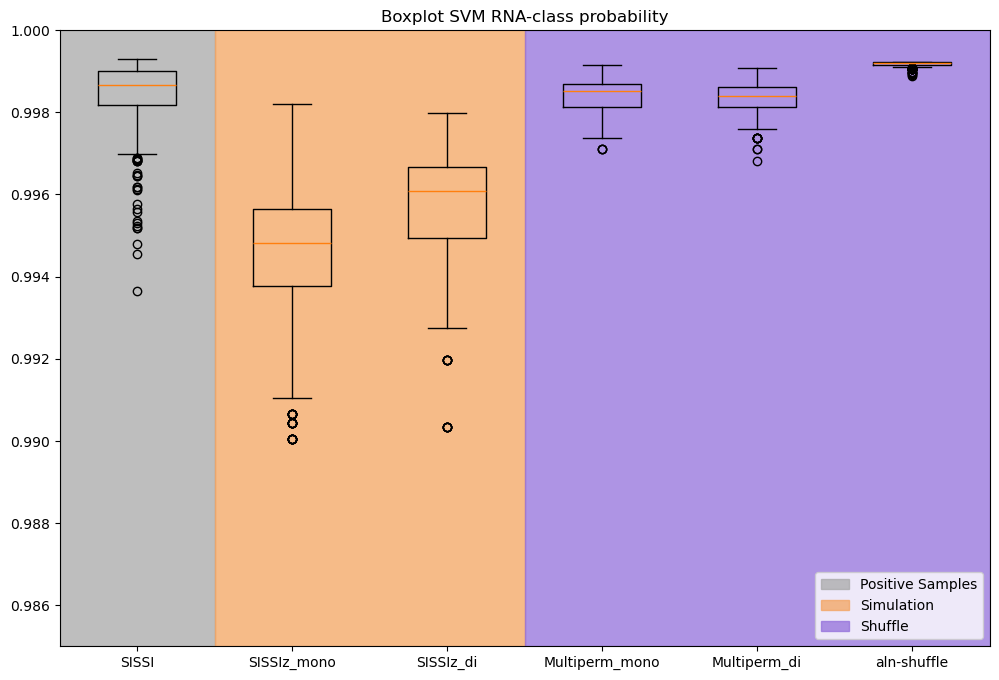

In [19]:
dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['SVM RNA-class probability'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.ylim(0.985, 1.0)
plt.title('Boxplot SVM RNA-class probability')
plt.legend()
plt.show()

## Structure conservation index (SCI)

C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\1882094440.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


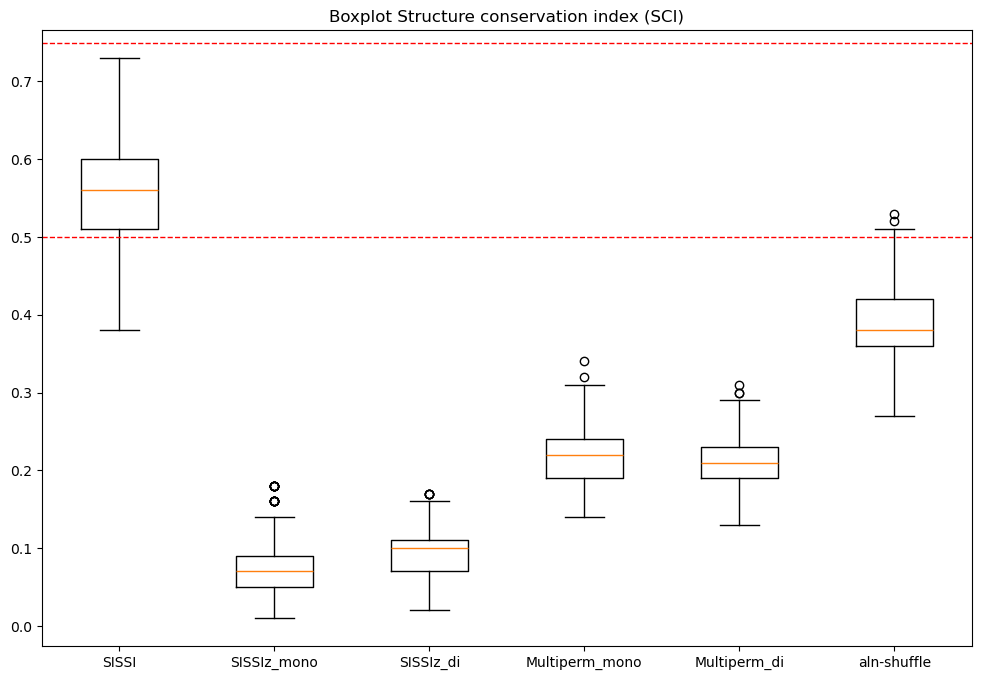

In [20]:
dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structure conservation index'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structure conservation index (SCI)')
plt.show()


## Mean z-score

C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\1086545868.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


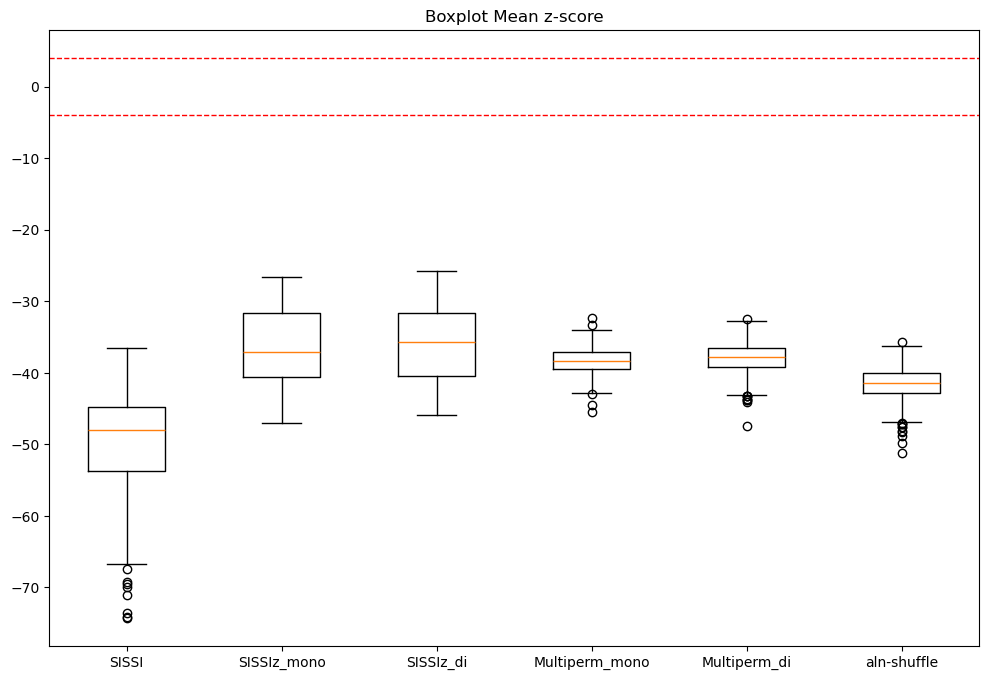

In [21]:
dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean z-score'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Mean z-score')
plt.show()

## Consensus MFE

C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\2230145245.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


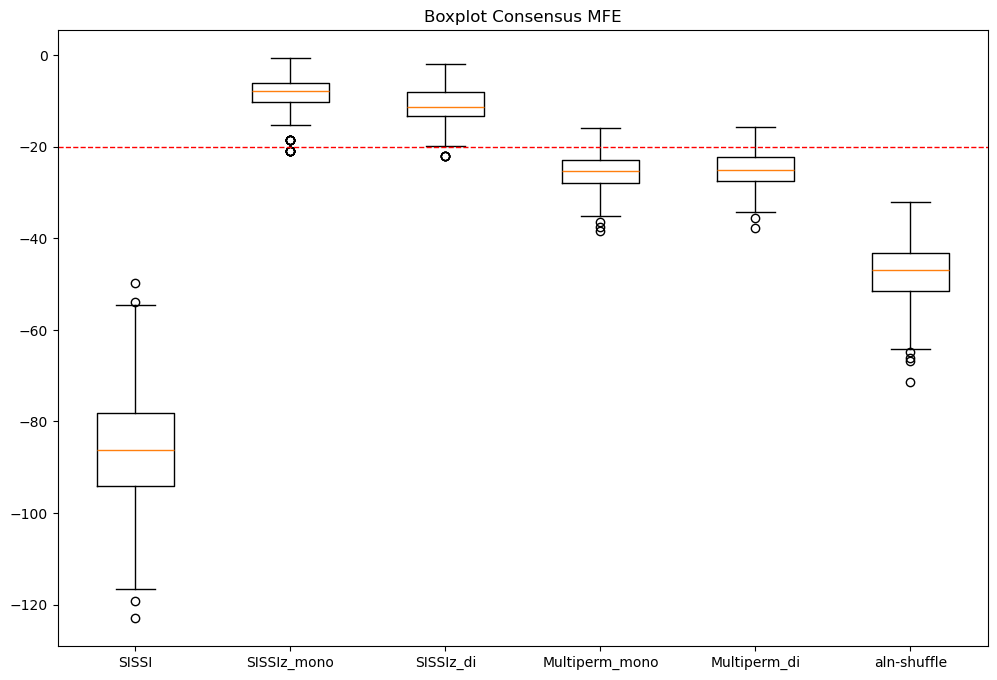

In [22]:
dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Consensus MFE'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Consensus MFE')
plt.show()

## Mean pairwise identity

C:\Users\Stefan\AppData\Local\Temp\ipykernel_19248\1678256478.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


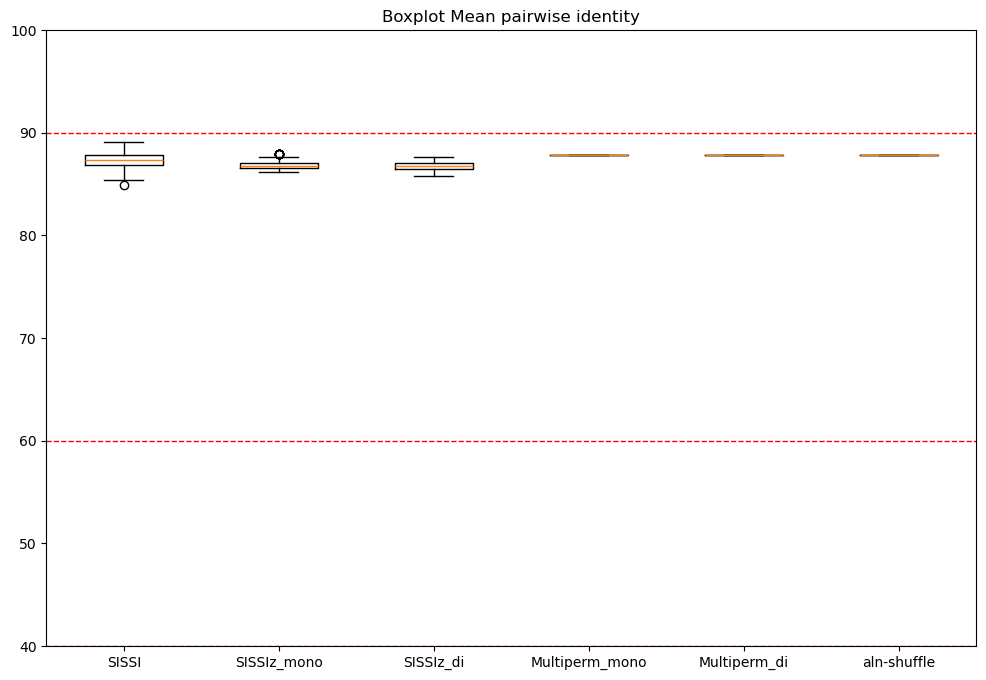

In [23]:
dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean pairwise identity'] for df in dataframes]
thresholds = [40, 60, 90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(40, 100)
plt.title('Boxplot Mean pairwise identity')
plt.show()

## Confusion Matrix and Roc-Curve

In [24]:
# def confusionMatrixAndRocCurve(data):
#     threshold = -3
#     data_X = data.drop(columns=["z-score calculated from 7. 8. and 9.", "File"])
#     data_y = (data['z-score calculated from 7. 8. and 9.'] > threshold).astype(int)

#     X_train, X_test, y_train, y_test = train_test_split(data_X, data_y , test_size=0.3, random_state=42)

#     model = LogisticRegression() 
#     model.fit(X_train, y_train) 
#     y_pred_proba = model.predict_proba(X_test)[:, 1] 
#     y_pred = (y_pred_proba >= 0.5).astype(int)

#     accuracy = accuracy_score(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)

#     print(accuracy)
#     print(class_report)
    
#     conf_matrix = metrics.confusion_matrix(y_test, y_pred)
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

#     cm_display.plot()
#     plt.show() 

#     fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

#     print(fpr)
#     print(tpr)
#     roc_auc = auc(fpr, tpr)

#     # Plot the ROC curve
#     plt.figure()  
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve for ...')
#     plt.legend()
#     plt.show()